# 21장 설명 가능한 딥러닝 모델 만들기

### 1.딥러닝의 결과를 설명하는 방법
- XAI(Explainable AI): 설명이 가능한 딥러닝
- 대표적인 사례 - CAM(Class Activation Map) <br>
**순서 방법**
1. 이 데이터를 1차원으로 축소시키는 Flatten 단계 직전에 개입해서 그때까지 만들어진 중간 맵 모으기
2. 이 평균값과 최종 예측 사이에서 한번 더 학습
3. 그러면 어떤 중간 맵이 최종 결정에 큰 역활을 하는지 알려 주는 가중치 흭득
4. 이 가중치를 각 중간맵에 곱해 중요한 중간 맵은 가중하고 불필요한 중간 맵은 자연스럽게 없애먄서 특징 맵을 만듬
5. 같은 원리지만 평균값을 계산하기 위해 모델의 구조를 바꾸어야 하는 번거로움을 피하고자 평균값 대신 기울기를 이용하는 방법도 개발 - 그레이디언트 CAM

### 2.설명 가능한 딥러닝의 실행

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16

# XAI 알고리즘
from tf_explain.core.grad_cam import GradCAM
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity

# 이미지를 불러와 보여주는 라이브러리
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
# 원본 이미지가 들어갈 리스트
images_originals = []

In [4]:
# 원본 이미지가 저장된 폴더에서 하나씩 불러와 리스트에 넣기
for img_path in glob.glob('./data/img/*_0.jpg'):
  images_originals.append(mpimg.imread(img_path))

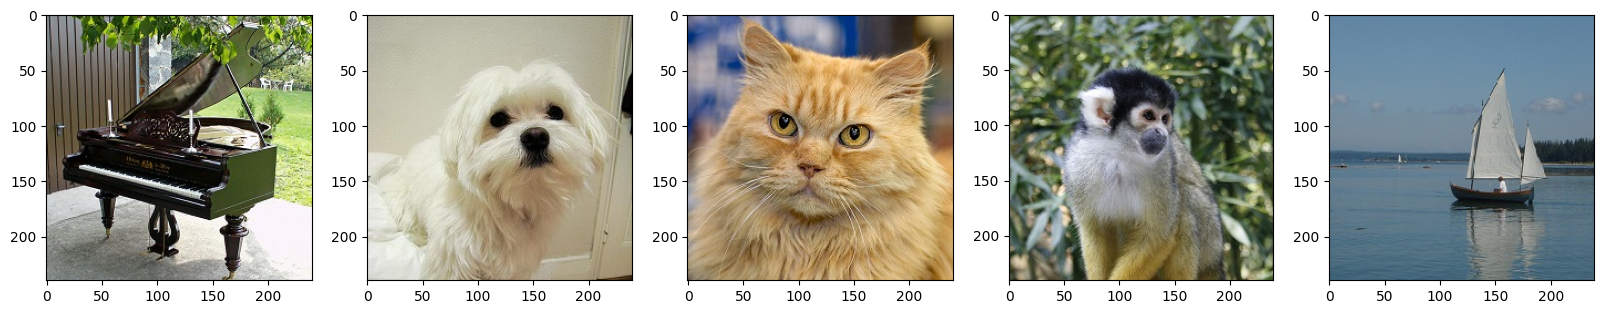

In [8]:
# 이미지 크기
plt.figure(figsize=(20,20))

# 원본 이미지 보이게 하기
for i, image_o in enumerate(images_originals):
  plt.subplot(5, 5, i+1)
  plt.imshow(image_o)

In [ ]:
# 사전에 학습된 딥러닝 모델 불러오기
model = VGG16(weights="imagenet", include_top=True)

In [ ]:
# 에러 발생
# 원본 이미지 이름과 Imagenet에서의 해당 이미지 인덱스
input_list = ["maltese", "persian_cat", "squirrel_monkey", "grand_piano", "yawl"]
imagenet_index = ["153", "283", "382", "579", "914"]

# 그레이디언트 CAM 알고리즘 선택
explainer = GradCAM()

# 그레이디언트 CAM 알고리즘이 적용된 이미지가 들어갈 빈 리스트 만들기
images_cams = []

# 그레이디언트 CAM 알고리즘 실행
for l, i in zip(input_list, imagenet_index):
    img = load_img('./data/img/{}_0.jpg'.format(l), target_size=(224, 224))
    img = img_to_array(img)
    data = ([img], None)  # Correctly format the input as a tuple (inputs, data)
    grid = explainer.explain(data, model, int(i), layer_name="block5_conv3")
    explainer.save(grid, '.', './data/img/{}_cam.jpg'.format(l))

# 그레이디언트 CAM 알고리즘이 적용된 이미지를 불러오는 부분의 시작입니다.
plt.figure(figsize=(20,20))

for img_path in glob.glob('./data/img/*_cam.jpg'):
    images_cams.append(mpimg.imread(img_path))

for i, image_c in enumerate(images_cams):
    plt.subplot(5, 5, i + 1)
    plt.imshow(image_c)

plt.tight_layout()
plt.show()

In [ ]:
# 오클루전 알고리즘을 불러와 실행합니다.

explainer = OcclusionSensitivity()

# 알고리즘이 적용된 이미지가 들어갈 빈 리스트 만들기
images_occ1s = []

# 패치 사이즈를 정합니다. 
patch_size = 40

# 오클루전 알고리즘 실행
for l, i in zip(input_list, imagenet_index):
    img = load_img('./data/img/{}_0.jpg'.format(l), target_size=(224, 224))
    img = img_to_array(img)
    data = ([img], None)
    grid = explainer.explain(data, model, int(i), patch_size) #패치 사이즈의 설정이 추가됩니다. 
    explainer.save(grid, ".", './data/img/{}_occ1.jpg'.format(l))

# 오클루전 알고리즘이 적용된 이미지를 불러오는 부분의 시작입니다.
plt.figure(figsize=(20,20))

for img_path in glob.glob('./data/img/*_occ1.jpg'):
    images_occ1s.append(mpimg.imread(img_path))

for i, image in enumerate(images_occ1s):
    plt.subplot(5, 5, i + 1)
    plt.imshow(image)

In [ ]:
patch_size = 20

images_occ2s = []

for l, i in zip(input_list, imagenet_index):
  img = load_img('./data/img/{}_0.jpg'.format(l), target_size=(224, 224))
  img = img_to_array(img)
  data = ([img], None)
  grid = explainer.explain(data, model, int(i), patch_size) 
  explainer.save(grid, ".", './data/img/{}_occ2.jpg'.format(l))

for img_path in glob.glob('./data/img/*_occ2.jpg'):
  images_occ2s.append(mpimg.imread(img_path))

plt.figure(figsize=(20,20))
for i, image in enumerate(images_occ2s):
  plt.subplot(5, 5, i + 1)
  plt.imshow(image)

In [ ]:
# 전체 이미지 한 눈에 보기.

plt.figure(figsize=(20,20))

images = []
for img_path in glob.glob('./data/img/*.jpg'):
    images.append(mpimg.imread(img_path))

for i, image in enumerate(images):
plt.subplot(5, 4, i + 1)
plt.imshow(image)